위스콘신 Breast Cander 데이터 셋

In [2]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
print(dataset.target_names)
cancer_df.target.value_counts()

['malignant' 'benign']


1    357
0    212
Name: target, dtype: int64

사이킷런 Wrapper XGBoost 적용

In [7]:
# 사이킷런 래퍼 XGBoost 클래스만 XGBClassifier

from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=100, stratify=y_label)

evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=400, eval_set=evals, eval_metric='logloss', verbose=True)

w_preds = xgb_wrapper.predict(X_test)
w_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.611895
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.544823
[2]	validation_0-logloss:0.490145
[3]	validation_0-logloss:0.44547
[4]	validation_0-logloss:0.407657
[5]	validation_0-logloss:0.375885
[6]	validation_0-logloss:0.346133
[7]	validation_0-logloss:0.320506
[8]	validation_0-logloss:0.300035
[9]	validation_0-logloss:0.282284
[10]	validation_0-logloss:0.264331
[11]	validation_0-logloss:0.250504
[12]	validation_0-logloss:0.236678
[13]	validation_0-logloss:0.226123
[14]	validation_0-logloss:0.217581
[15]	validation_0-logloss:0.207879
[16]	validation_0-logloss:0.201837
[17]	validation_0-logloss:0.194265
[18]	validation_0-logloss:0.18755
[19]	validation_0-logloss:0.179284
[20]	validation_0-logloss:0.176208
[21]	validation_0-logloss:0.169577
[22]	validation_0-logloss:0.166228
[23]	validation_0-logloss:0.164591
[24]	validation_0-logloss:0.159216
[25]	validation_0-logloss:0.15423
[26]	validation_0-logloss:0.150833

[230]	validation_0-logloss:0.100973
[231]	validation_0-logloss:0.101186
[232]	validation_0-logloss:0.100998
[233]	validation_0-logloss:0.100867
[234]	validation_0-logloss:0.100877
[235]	validation_0-logloss:0.101279
[236]	validation_0-logloss:0.101256
[237]	validation_0-logloss:0.101237
[238]	validation_0-logloss:0.101083
[239]	validation_0-logloss:0.101132
[240]	validation_0-logloss:0.101069
[241]	validation_0-logloss:0.101048
[242]	validation_0-logloss:0.100787
[243]	validation_0-logloss:0.100795
[244]	validation_0-logloss:0.100664
[245]	validation_0-logloss:0.1009
[246]	validation_0-logloss:0.100851
[247]	validation_0-logloss:0.100963
[248]	validation_0-logloss:0.100814
[249]	validation_0-logloss:0.101023
[250]	validation_0-logloss:0.101259
[251]	validation_0-logloss:0.10108
[252]	validation_0-logloss:0.101475
[253]	validation_0-logloss:0.101454
[254]	validation_0-logloss:0.101327
[255]	validation_0-logloss:0.101335
[256]	validation_0-logloss:0.101726
[257]	validation_0-logloss:0.10

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
                                precision_score, recall_score, f1_score, roc_auc_score

In [13]:
def get_clf_eval (y_test, pred, pred_proba):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred_proba)
    
    print('오차행렬\n')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, f1 score : {3:.4f}, AUC score : {4:.4f}'\
            .format(accuracy,precision,recall,f1,roc_auc))

In [14]:
get_clf_eval(y_test, w_preds, w_preds_proba)

오차행렬

[[38  4]
 [ 1 71]]
정확도 : 0.9561, 정밀도 : 0.9467, 재현율 : 0.9861, f1 score : 0.9660, AUC score : 0.9924


조기 종료(early stopping)는 이전 epoch(학습 횟수)때와 비교해서 오차가 증가했다면 학습을 중단한다는 방법이다.따라서 어떤 일정한 epoch 수를 거듭하면서 계속해서 오차가 증가하면 학습을 중단한다'는 방식으로 구현해야 한다.

In [8]:
# early_stopping = 10 설정
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_set=evals, eval_metric='logloss', verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.611895
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.544823
[2]	validation_0-logloss:0.490145
[3]	validation_0-logloss:0.44547
[4]	validation_0-logloss:0.407657
[5]	validation_0-logloss:0.375885
[6]	validation_0-logloss:0.346133
[7]	validation_0-logloss:0.320506
[8]	validation_0-logloss:0.300035
[9]	validation_0-logloss:0.282284
[10]	validation_0-logloss:0.264331
[11]	validation_0-logloss:0.250504
[12]	validation_0-logloss:0.236678
[13]	validation_0-logloss:0.226123
[14]	validation_0-logloss:0.217581
[15]	validation_0-logloss:0.207879
[16]	validation_0-logloss:0.201837
[17]	validation_0-logloss:0.194265
[18]	validation_0-logloss:0.18755
[19]	validation_0-logloss:0.179284
[20]	validation_0-logloss:0.176208
[21]	validation_0-logloss:0.169577
[22]	validation_0-logloss:0.166228
[23]	validation_0-logloss:0.164591
[24]	validation_0-logloss:0.159216
[25]	validation_0-logloss:0.15423
[26]	validation_0-logloss:0.150833


In [15]:
# auc가 더 떨어졌다
get_clf_eval(y_test, ws10_preds, ws10_preds_proba)

오차행렬

[[39  3]
 [ 1 71]]
정확도 : 0.9649, 정밀도 : 0.9595, 재현율 : 0.9861, f1 score : 0.9726, AUC score : 0.9917


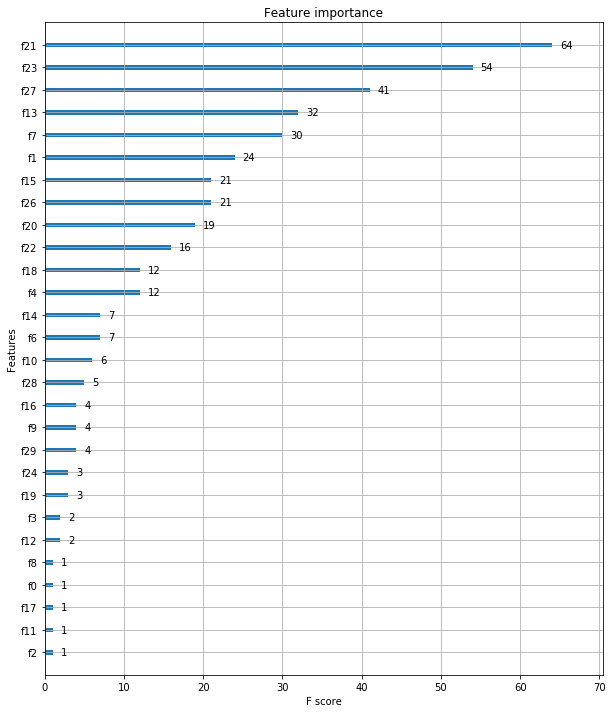

In [16]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)